In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5161.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_4769.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_1443.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5261.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/Tuberculosis-392.jpg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5266.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_2134.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_991.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_1548.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/Tuberculosis-176.jpg
/ka

In [2]:
BASE_PATH = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset"

TRAIN_DIR = os.path.join(BASE_PATH, "train")
VAL_DIR   = os.path.join(BASE_PATH, "val")
TEST_DIR  = os.path.join(BASE_PATH, "test")

In [3]:
print("Dataset folders:", os.listdir(BASE_PATH))
print("Train path:", TRAIN_DIR)
print("Test path:", TEST_DIR)
print("Val path:", VAL_DIR)

Dataset folders: ['val', 'test', 'train']
Train path: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train
Test path: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test
Val path: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val


In [5]:
classes=os.listdir(TRAIN_DIR)
classes

['Tuberculosis',
 'Bacterial Pneumonia',
 'Corona Virus Disease',
 'Normal',
 'Viral Pneumonia']

In [6]:
num_classes=len(classes)
num_classes

5

In [8]:
sample_class = classes[0]   #Tuberculosis
sample_dir = os.path.join(TRAIN_DIR, sample_class)

sample_images = random.sample(os.listdir(sample_dir), 5)
sample_images

['test_0_4457.jpeg',
 'Tuberculosis-337.jpg',
 'test_0_6558.jpeg',
 'Tuberculosis-284.jpg',
 'Tuberculosis-597.jpg']

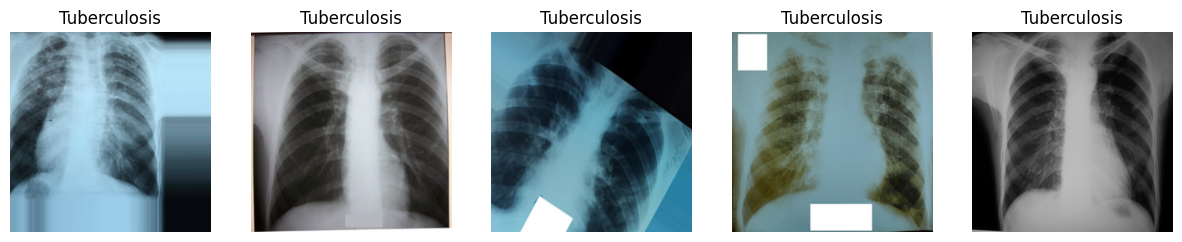

In [9]:
plt.figure(figsize=(15, 3))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_dir, img_name)
    
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img_array.astype("uint8"))
    plt.title(sample_class)
    plt.axis("off")

plt.show()

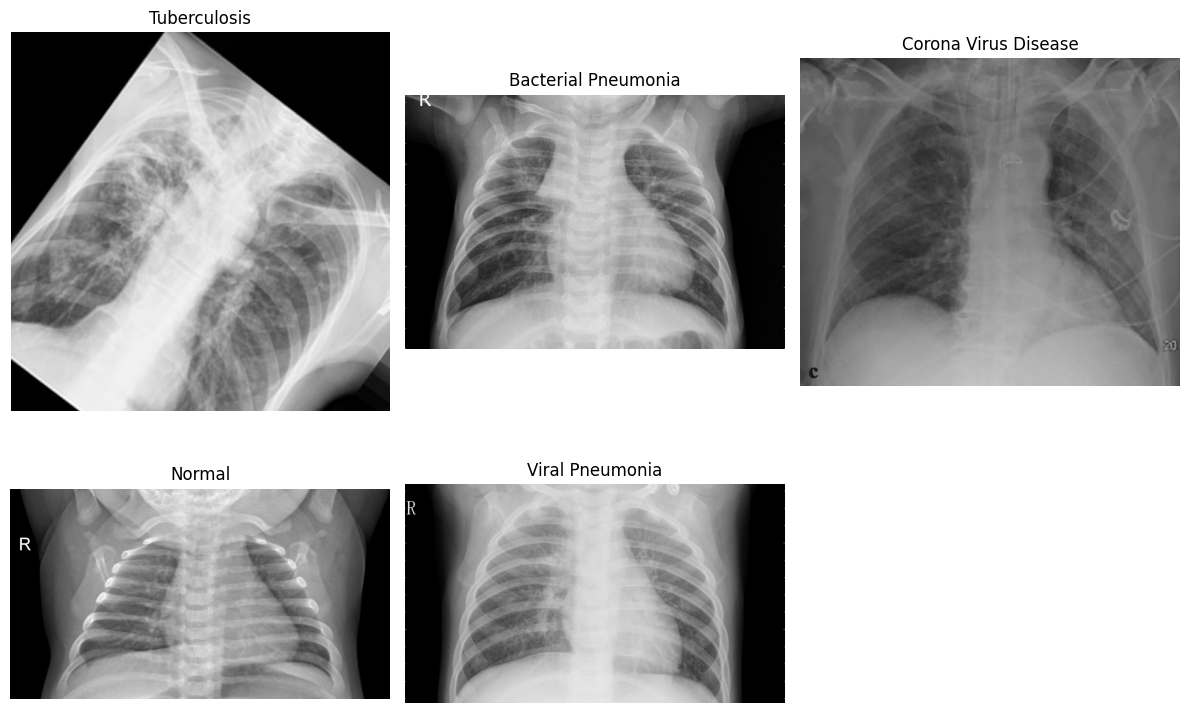

In [10]:
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(TRAIN_DIR, class_name)
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)
    
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img_array.astype("uint8"))
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [11]:
img_array.shape

(792, 1376, 3)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


# Baseline CNN model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential([
        # First Conv Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        # Second Conv Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Third Conv Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Classifier
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])

In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 110, 110, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 53, 53, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,877 (84.87 MB)

 Trainable params: 22,246,917 (84.87 MB)

 Non-trainable params: 960 (3.75 KB)

In [23]:
history=model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1768256525.829867     466 service.cc:148] XLA service 0x7e6960008d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768256525.830511     466 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1768256525.830532     466 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1768256526.349609     466 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/190 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.2578 - loss: 2.8023 

I0000 00:00:1768256534.181352     466 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5867 - loss: 1.2035 - val_accuracy: 0.2455 - val_loss: 4.2659
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 116s 610ms/step - accuracy: 0.7127 - loss: 0.7004 - val_accuracy: 0.4241 - val_loss: 2.1754
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 117s 613ms/step - accuracy: 0.7393 - loss: 0.6561 - val_accuracy: 0.2297 - val_loss: 3.9738
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 116s 610ms/step - accuracy: 0.7562 - loss: 0.6090 - val_accuracy: 0.3328 - val_loss: 47.6859
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 116s 611ms/step - accuracy: 0.7924 - loss: 0.5177 - val_accuracy: 0.3249 - val_loss: 7.9644
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 116s 610ms/step - accuracy: 0.7774 - loss: 0.5347 - val_accuracy: 0.5992 - val_loss: 1.3329
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 116s 609ms/step - accuracy: 0.7726 - loss: 0.5450 - val_accuracy: 0.2083 - val_loss: 5.8505
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 116s 611ms/step - accuracy: 0.7960 - loss: 0.4836

In [26]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 542ms/step - accuracy: 0.5349 - loss: 1.2701
Test Accuracy: 0.5856789946556091
Test Loss: 1.473554015159607


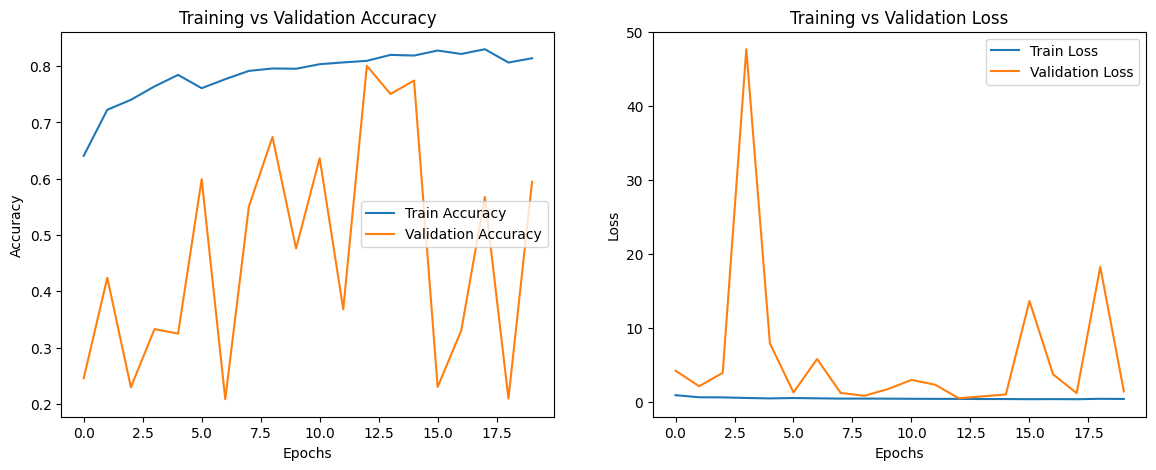

In [27]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step
                      precision    recall  f1-score   support

        Tuberculosis       0.71      0.40      0.52       403
 Bacterial Pneumonia       0.57      0.94      0.71       407
Corona Virus Disease       0.56      0.27      0.37       404
              Normal       1.00      0.50      0.67       408
     Viral Pneumonia       0.45      0.81      0.58       403

            accuracy                           0.59      2025
           macro avg       0.66      0.59      0.57      2025
        weighted avg       0.66      0.59      0.57      2025



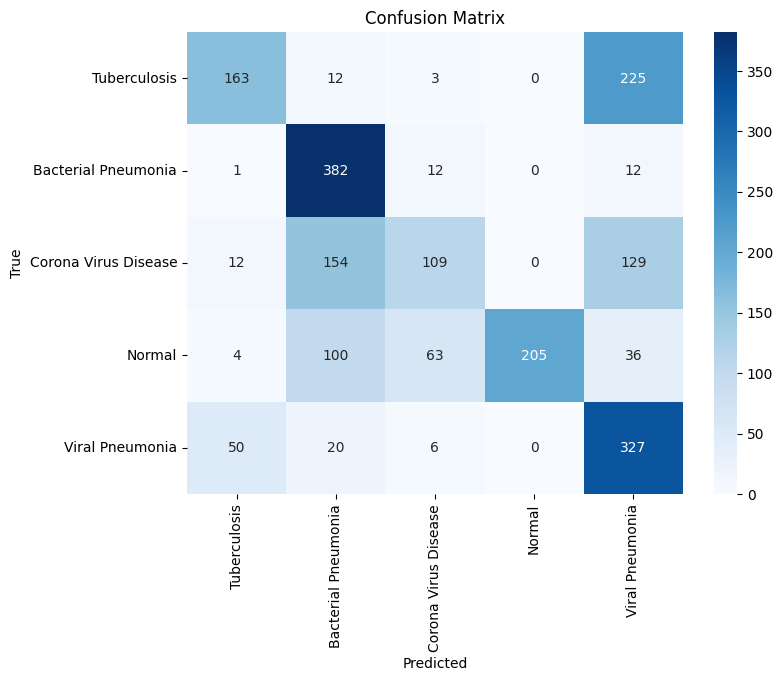

In [29]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=classes))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Enhanced Approach: Using Ensemble of EfficientNetB3 and DenseNet121

In [31]:
def print_dataset_info(split_name, split_dir):
    print(f"\n{split_name} dataset:")
    print(f"Dataset directory: {split_dir}")
    
    for class_name in sorted(os.listdir(split_dir)):
        class_path = os.path.join(split_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f"Class: {class_name}, Number of images: {num_images}")

print_dataset_info("Training", TRAIN_DIR)
print_dataset_info("Validation", VAL_DIR)
print_dataset_info("Test", TEST_DIR)


Training dataset:
Dataset directory: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train
Class: Bacterial Pneumonia, Number of images: 1205
Class: Corona Virus Disease, Number of images: 1218
Class: Normal, Number of images: 1207
Class: Tuberculosis, Number of images: 1220
Class: Viral Pneumonia, Number of images: 1204

Validation dataset:
Dataset directory: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val
Class: Bacterial Pneumonia, Number of images: 401
Class: Corona Virus Disease, Number of images: 406
Class: Normal, Number of images: 402
Class: Tuberculosis, Number of images: 406
Class: Viral Pneumonia, Number of images: 401

Test dataset:
Dataset directory: /kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test
Class: Bacterial Pneumonia, Number of images: 403
Class: Corona Virus Disease, Number of images: 407
Class: Normal, Number of images: 404
Class: Tuberculosis, Number of images: 408
Class: Viral Pneumonia, Number of imag

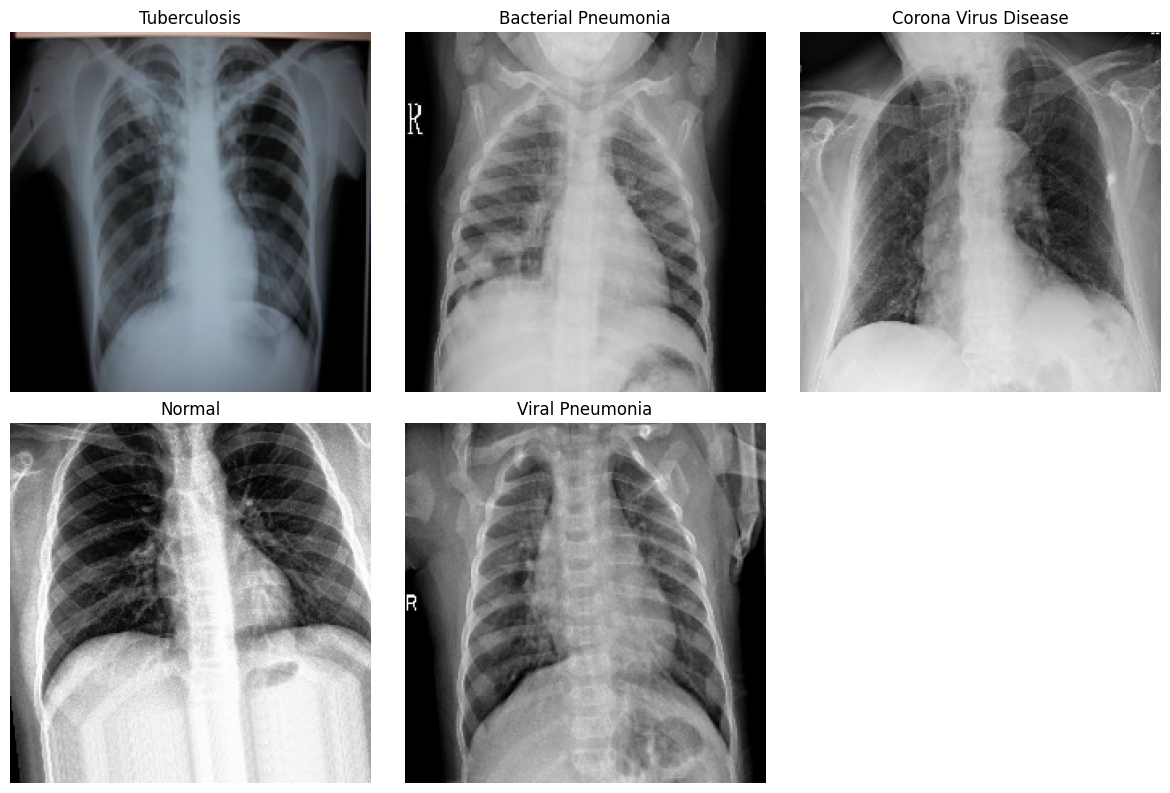

In [35]:
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(TRAIN_DIR, class_name)
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)
    
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img).astype("uint8")
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img_array)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [36]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3, DenseNet121
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [37]:
# Shared input
input_layer = Input(shape=(224,224,3))

# Pretrained models
eff = EfficientNetB3(
    weights="imagenet",
    include_top=False,
    input_tensor=input_layer
)

dense = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_tensor=input_layer
)

# Freeze both backbones
eff.trainable = False
dense.trainable = False

# Feature extraction
eff_feat = GlobalAveragePooling2D()(eff.output)
dense_feat = GlobalAveragePooling2D()(dense.output)

# Combine features (ensemble)
combined = Concatenate()([eff_feat, dense_feat])

# Classifier head
x = Dense(512, activation="relu")(combined)
x = Dropout(0.5)(x)

x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)

output = Dense(5, activation="softmax")(x)

# Final model
model = Model(inputs=input_layer, outputs=output)

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
ensemble_model = model

ensemble_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [41]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-6
)

In [42]:
ensemble_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 19,264,884 (73.49 MB)

 Trainable params: 1,443,845 (5.51 MB)

 Non-trainable params: 17,821,039 (67.98 MB)

In [44]:
history_ensemble = ensemble_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 238s 942ms/step - accuracy: 0.5180 - loss: 1.1842 - val_accuracy: 0.7837 - val_loss: 0.5922 - learning_rate: 0.0010
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 121s 635ms/step - accuracy: 0.7191 - loss: 0.6600 - val_accuracy: 0.8001 - val_loss: 0.4939 - learning_rate: 0.0010
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 119s 626ms/step - accuracy: 0.7275 - loss: 0.6359 - val_accuracy: 0.7991 - val_loss: 0.4956 - learning_rate: 0.0010
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 119s 624ms/step - accuracy: 0.7458 - loss: 0.5851 - val_accuracy: 0.7842 - val_loss: 0.5022 - learning_rate: 0.0010
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 119s 629ms/step - accuracy: 0.7599 - loss: 0.5797 - val_accuracy: 0.7847 - val_loss: 0.5306 - learning_rate: 0.0010
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 119s 627ms/step - accuracy: 0.7762 - loss: 0.5191 - val_accuracy: 0.8313 - val_loss: 0.4205 - learning_rate: 3.0000e-04
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 123s 647ms/step - ac

In [45]:
test_loss, test_accuracy = ensemble_model.evaluate(test_generator)

print("Ensemble Test Accuracy:", test_accuracy)
print("Ensemble Test Loss:", test_loss)

64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 537ms/step - accuracy: 0.8212 - loss: 0.4504
Ensemble Test Accuracy: 0.8469135761260986
Ensemble Test Loss: 0.3645711839199066


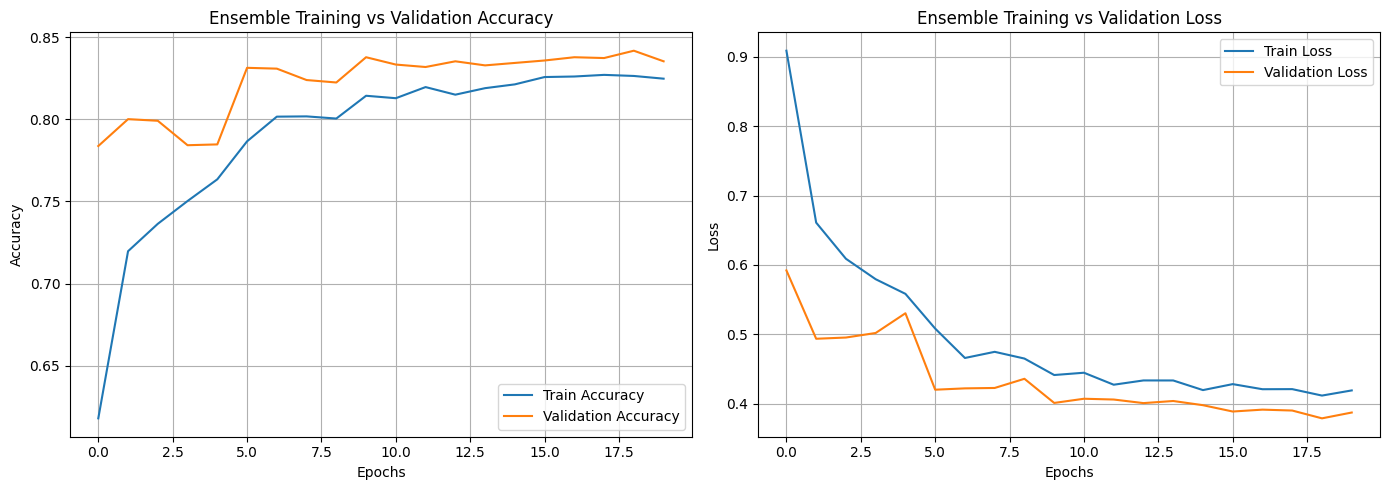

In [48]:

# Accuracy plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history_ensemble.history["accuracy"], label="Train Accuracy")
plt.plot(history_ensemble.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Ensemble Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_ensemble.history["loss"], label="Train Loss")
plt.plot(history_ensemble.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Ensemble Training vs Validation Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step
Classification Report:

                      precision    recall  f1-score   support

        Tuberculosis       0.72      0.72      0.72       403
 Bacterial Pneumonia       0.96      0.95      0.96       407
Corona Virus Disease       0.85      0.97      0.90       404
              Normal       0.97      0.97      0.97       408
     Viral Pneumonia       0.71      0.62      0.66       403

            accuracy                           0.85      2025
           macro avg       0.84      0.85      0.84      2025
        weighted avg       0.84      0.85      0.84      2025



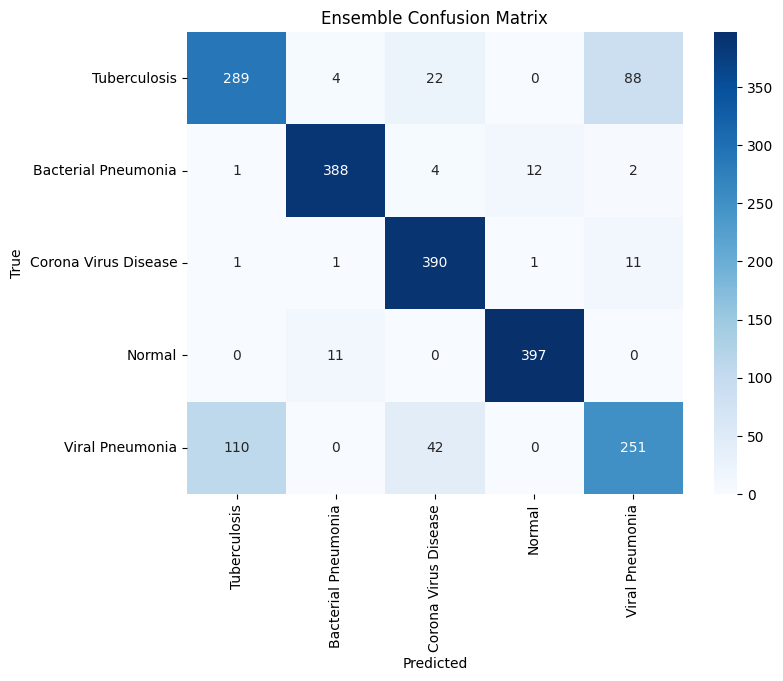

In [50]:
y_pred = ensemble_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=classes))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Ensemble Confusion Matrix")
plt.show()

In [53]:
ensemble_model.save("/kaggle/working/lung_disease_ensemble_model.h5")
print("Model saved successfully!")

Model saved successfully!


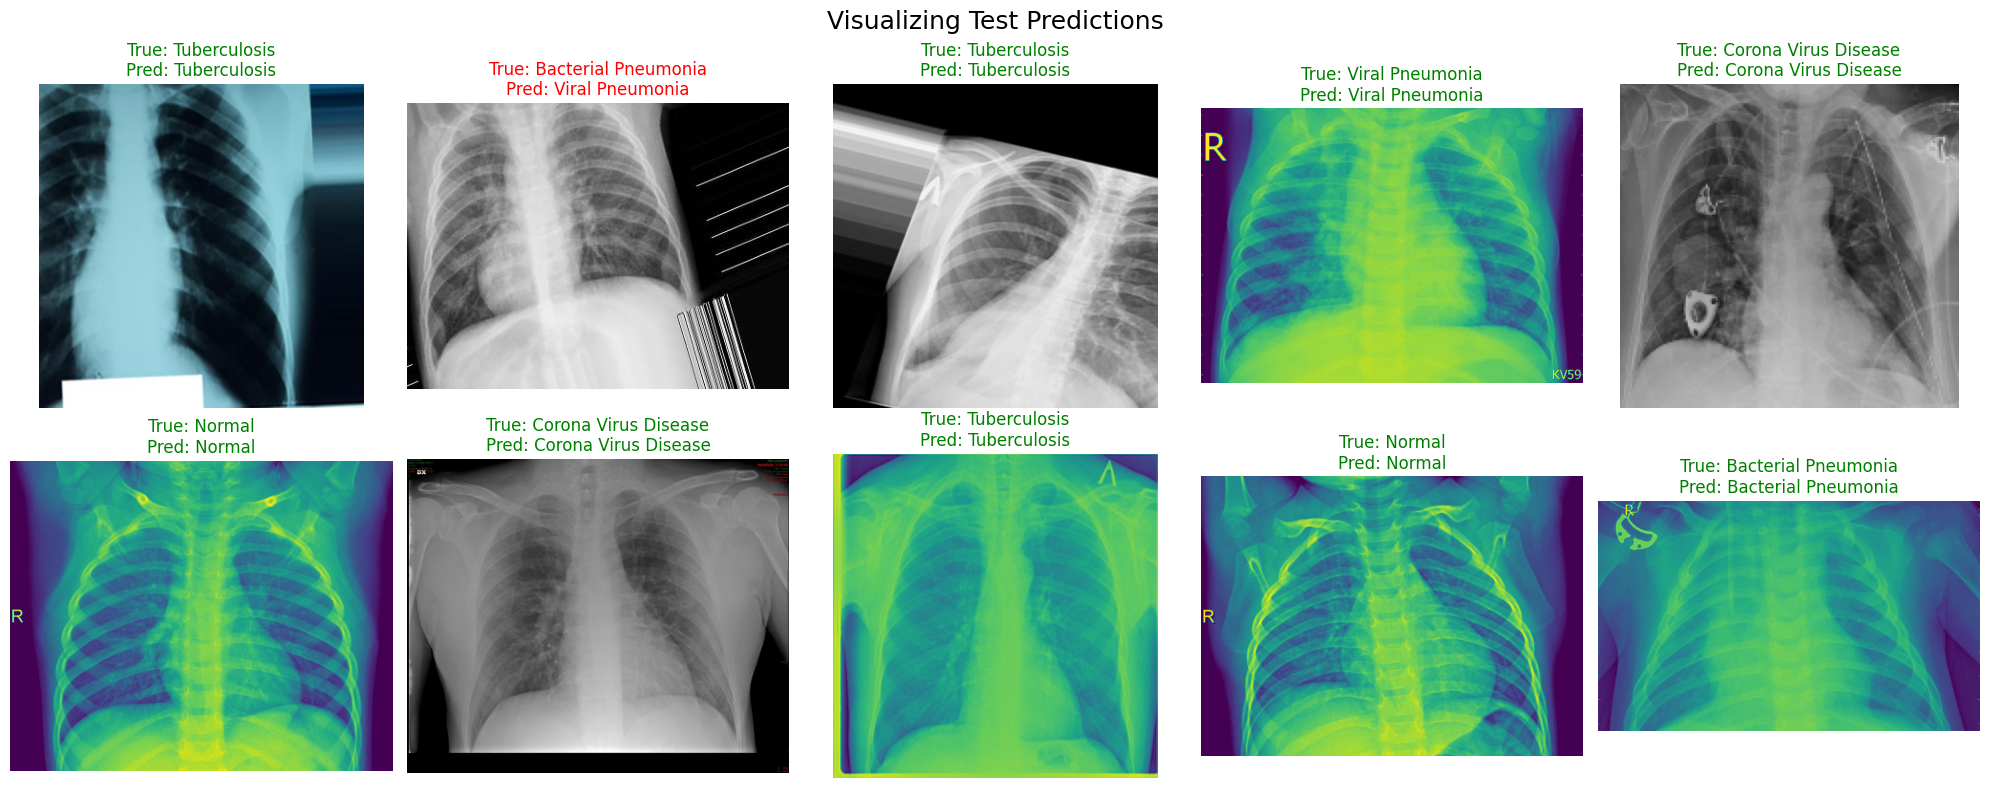

In [55]:
class_indices = test_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

def visualize_test_predictions(
    model,
    test_dir,
    num_images=10,
    img_size=224
):
    classes = sorted(os.listdir(test_dir))
    images = []

    # Collect random images from test set
    for _ in range(num_images):
        true_class = random.choice(classes)
        class_path = os.path.join(test_dir, true_class)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        images.append((img_path, true_class))

    plt.figure(figsize=(20, 8))

    for i, (img_path, true_class) in enumerate(images):
        img = plt.imread(img_path)

        # Preprocess
        from tensorflow.keras.preprocessing import image
        img_pil = image.load_img(img_path, target_size=(img_size, img_size))
        img_array = image.img_to_array(img_pil) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Prediction
        preds = model.predict(img_array, verbose=0)
        pred_idx = np.argmax(preds)
        pred_class = idx_to_class[pred_idx]

        # Color logic
        color = "green" if pred_class == true_class else "red"

        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(img)
        plt.title(
            f"True: {true_class}\nPred: {pred_class}",
            color=color,
            fontsize=12
        )
        plt.axis("off")

    plt.suptitle("Visualizing Test Predictions", fontsize=18)
    plt.tight_layout()
    plt.show()

test_dir = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"

visualize_test_predictions(
    model=ensemble_model,
    test_dir=test_dir,
    num_images=10
)